In [ ]:
import sympy as sy
import numpy as np
import matplotlib.pylab as plt

Código markdown

supongamos que tenemos los siguientes valores de x e y

- Lista de valores de x: x=[2,5,6]
- Lista de valores de y: y=[4,1,1]

A continuación, realizaremos la interpolación de lagrange paso a paso:

1. Inicialización de polinomios y variables

- Definir tres polinomios de la Lagrange: $L0=L1=L2=1$
- Inicializar j=1

2. Cálculo de los polinomios de Lagrange:
    a. Para cada i desde 1 hasta 3, hacer lo siguiente:
    - Si i es diferente de j, calcular $L_0$ de la siguiente manera

    $L_0=L_0*(x-x[i]/(x[j]-x[i])$

- Establecer j=2

    b. Para cada i desde 1 hasta 3, hacer lo siguiente:
    - Si i es diferente de j, calcular $L_1$ de la siguiente manera:

    $L_1=L_1*(x-x[i]/(x[j]-x[i])$

- Establecer j=3

    c. Para cada i desde 1 hasta 3, hacer lo siguiente:
    - Si i es diferente de j, calcular $L_2$ de la siguiente manera:

    $L_2=L_2*(x-x[i]/(x[j]-x[i])$

3. Cálculo del polinomio de interpolación:
    - Calcular el polinomio $p(x)$ utilizando los polinomios de Lagrange y los valores de $y$ de la siguiente manera:

    $p(x)=y[0]*L_0+y[1]*L_1+y[2]*L_2$

4. Mostrar el resultado
    - Muestra el polinomio $p(x)$. En este caso,$p(x)$ será la expresión final que representa el polinomio de la interpolación de Lagrange

In [ ]:
#Defina las coordenadas
puntos=[[2,4],[5,1],[6,1]]

In [ ]:
#Tomar a x como simbolo para poder operar
x=sy.Symbol("x")

#Vectores
x_=np.array([2,5,6])
y_=np.array([4,1,1])
#indice superior
n=len(x_)

#Valor inicial
L0=1
L0= (x - x_[1] / x_[0] - x_[1])
L0=L0*(x - x_[1]) / (x_[0] - x_[1])

#indice fijo
j=0

In [ ]:
#productoria
for i in range(0,n):
    if i != j:
        L0*= (x - x_[i]) / (x_[j] - x_[i])

In [ ]:
#Función definida para la productoria
def lagrange(j,x_):
    L0=1
    n=len(x_)
    for i in range(0,n):
        if i != j:
            L0*=((x - x_[i]) / (x_[j] - x_[i]))
    return L0
lagrange(0,x_)

(3/2 - x/4)*(5/3 - x/3)

In [ ]:
n=len(x_)
lagrange(0,x_)

(3/2 - x/4)*(5/3 - x/3)

In [ ]:
n=len(x_)
lagrange(1,x_)

(6 - x)*(x/3 - 2/3)

In [ ]:
n=len(x_)
lagrange(2,x_)

(x/4 - 1/2)*(x - 5)

In [ ]:
fxn=sy.lambdify(x,L0,"numpy")
fxn(x)

(1.66666666666667 - 0.333333333333333*x)*(0.0833333333333333*x - 0.5)*(x - 7.5)*(x - 5)

In [ ]:
def lagrange(j,n,x_):
    L0=1
    n=len(x_)
    for i in range(0,n):
        if (i != j):
            L0*= (x - x_[i]) / (x_[j] - x_[i])
    return L0

def P(x,x_,y_):
    poly=0
    for i in range(0,len(y_)):
        poly += y_[i]*lagrange(i,n,x_)
    return poly

In [ ]:
x_=np.array([2,5,6])
y_=np.array([4,1,2])
sy.simplify(P(x,x_, y_))

x**2/2 - 9*x/2 + 11

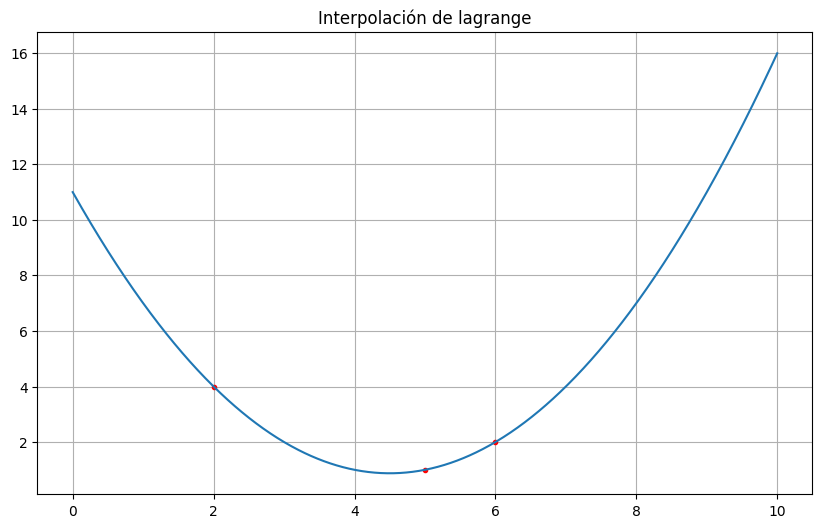

In [ ]:
#Gráfico del resultado
poly=lambda x:((x**2)/2)-((9*x)/2)+11
intervalo_x_=np.linspace(0,10,1000)
plt.figure(figsize=(10,6))
plt.plot(x_,y_,".r")
plt.plot(intervalo_x_,poly(intervalo_x_))
plt.title("Interpolación de lagrange")
plt.grid(True)
plt.show()